In [1]:
import os, sys, re
import subprocess
import json
import uproot3
import awkward as ak
import numpy as np
from coffea import processor, util, hist
import pickle
import matplotlib.pyplot as plt

In [2]:
with open('xsec.json') as f:
    xs = json.load(f)
        
with open('pmap.json') as f:
    pmap = json.load(f)

with open('lumi.json') as f:
    lumis = json.load(f)
  

In [3]:
indir = "outfiles/"
infiles = subprocess.getoutput("ls "+indir+"/*_dask_JetHTData.coffea").split()
outsum = processor.dict_accumulator()

started = 0
for filename in infiles:

    print("Loading "+filename)

    if os.path.isfile(filename):
        out = util.load(filename)

        if started == 0:
            outsum['templates'] = out['templates']
            outsum['sumw'] = out['sumw']
            started += 1
        else:
            outsum['templates'].add(out['templates'])
            outsum['sumw'].add(out['sumw'])

        del out

#scale_lumi = {k: xs[k] * 1000 * lumis[year] / w for k, w in outsum['sumw'].items()} 
#outsum['templates'].scale(scale_lumi, 'dataset')
templates = outsum['templates'].group('dataset', hist.Cat('process', 'Process'), pmap)

del outsum

Loading outfiles//2016APV_dask_JetHTData.coffea
Loading outfiles//2016_dask_JetHTData.coffea
Loading outfiles//2017_dask_JetHTData.coffea
Loading outfiles//2018_dask_JetHTData.coffea


/opt/conda/lib/python3.8/site-packages/coffea/hist/hist_tools.py:376: RuntimeWarning: Not all requested indices present in <Cat (name=dataset) instance at 0x7f9368d7b790>
  warnings.warn(


In [4]:
ggf = templates.integrate('region','signal-ggf').integrate('mjj',overflow='allnan').sum('genflavor').integrate('systematic','nominal')
h = ggf.integrate('process','data')

In [5]:
ptbins = [450, 500, 550, 600, 675, 800, 1200]

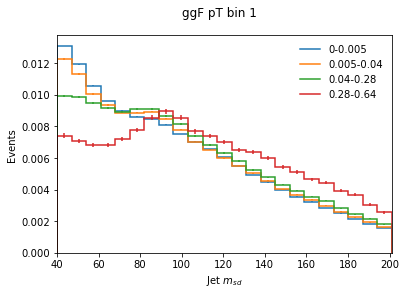

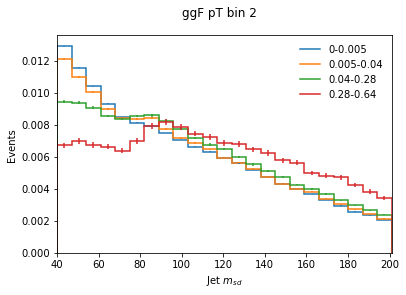

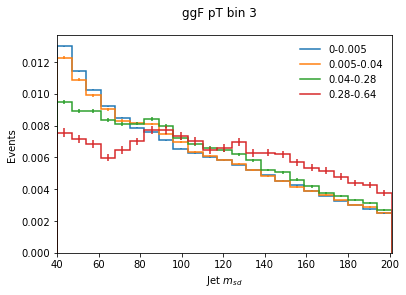

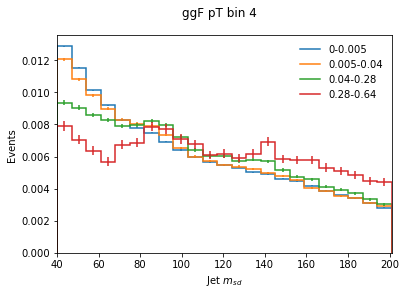

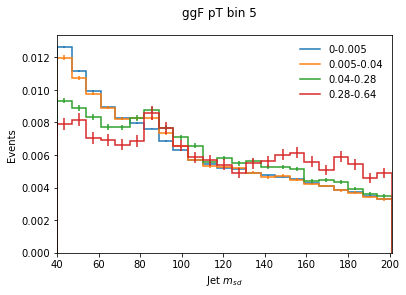

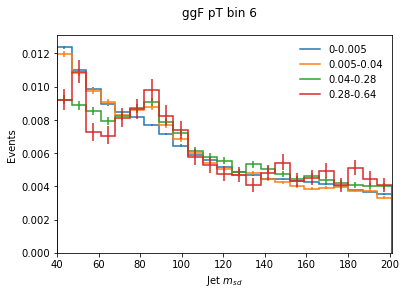

In [6]:
for i in range(0,len(ptbins)-1):
    ggf_i = h.integrate('pt1',int_range=slice(ptbins[i],ptbins[i+1]))
    hist.plot1d(ggf_i,overlay='ddb1',density=True,order=[0,1,2,3])
    plt.legend(frameon=False,labels=["0-0.005","0.005-0.04","0.04-0.28","0.28-0.64"])
    plt.suptitle('ggF pT bin '+str(i+1))
    plt.savefig('jans-test/figures/Allyears_ggF'+str(i+1)+'.png')
    plt.show()

In [7]:
vbf = templates.integrate('region','signal-vbf').sum('pt1','genflavor').integrate('systematic','nominal')
h = vbf.integrate('process','data')

In [8]:
h.identifiers('ddb1')

[<Interval ([0, 0.005)) instance at 0x7f93c1626340>,
 <Interval ([0.005, 0.04)) instance at 0x7f93c16264f0>,
 <Interval ([0.04, 0.28)) instance at 0x7f936006e4c0>,
 <Interval ([0.28, 0.64)) instance at 0x7f936006e700>,
 <Interval ([0.64, 1)) instance at 0x7f93600d7100>]

In [9]:
mjjbins = [1000,2000,13000]

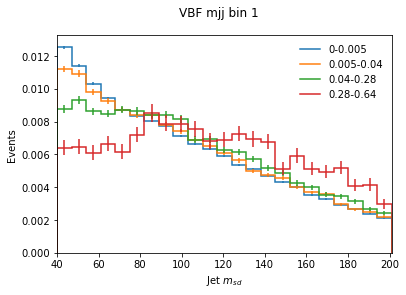

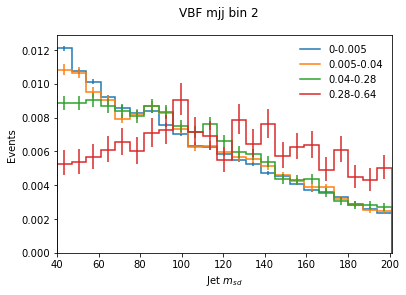

In [10]:
for i in range(0,len(mjjbins)-1):
    vbf_i = h.integrate('mjj',int_range=slice(mjjbins[i],mjjbins[i+1]))
    hist.plot1d(vbf_i,overlay='ddb1',density=True,order=[0,1,2,3])
    plt.legend(frameon=False,labels=["0-0.005","0.005-0.04","0.04-0.28","0.28-0.64"])
    plt.suptitle('VBF mjj bin '+str(i+1))
    plt.savefig('jans-test/figures/Allyears_VBF'+str(i+1)+'.png')
    plt.show()